<a href="https://colab.research.google.com/github/LiTaokui/Curve_Fitting/blob/main/Circle_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df = pd.read_excel("/content/edge-data_1C4A6507.JPG_v8.1.xlsx")
print(df)

            x        y1        y2  one  Unnamed: 4  Unnamed: 5
0    0.031847  1.178344  5.732484    1          37         180
1    0.063694  1.178344  5.732484    1          37         180
2    0.095541  1.210191  5.700637    1          38         179
3    0.127389  1.210191  5.700637    1          38         179
4    0.159236  1.210191  5.700637    1          38         179
..        ...       ...       ...  ...         ...         ...
143  4.585987  1.560510  5.668790    1          49         178
144  4.617834  1.560510  5.668790    1          49         178
145  4.649682  1.560510  5.668790    1          49         178
146  4.681529  1.560510  5.668790    1          49         178
147  4.713376  1.560510  5.668790    1          49         178

[148 rows x 6 columns]


In [62]:
x = list(df['x'])
y1 = list(df['y1'])
y2 = list(df['y2'])

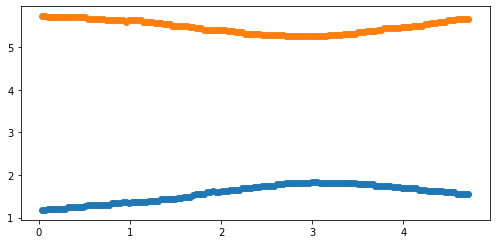

In [63]:
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.show()

#Not all the data points can be used to fit our circle!!!



We need to manually select data point that seems to fit out circle!

This time we choose datapoint from 58 to 120!

In [64]:
new_df = df.iloc[58:120, 0:4]
new_df

,x,y1,y2,one
58,1.878981,1.592357,5.414013,1
59,1.910828,1.624204,5.414013,1
60,1.942675,1.592357,5.414013,1
61,1.974522,1.592357,5.414013,1
62,2.006369,1.624204,5.414013,1
...,...,...,...,...
115,3.694268,1.751592,5.382166,1
116,3.726115,1.751592,5.414013,1
117,3.757962,1.751592,5.414013,1
118,3.789809,1.751592,5.445860,1


In [65]:
x_new = list(new_df['x'])
y1_new = list(new_df['y1'])
y2_new = list(new_df['y2'])
y3_new = list(new_df['one'])

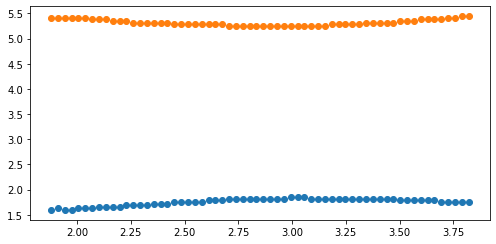

In [66]:
plt.scatter(x_new, y1_new)
plt.scatter(x_new, y2_new)
plt.show()

That looks better!

In [67]:
result = new_df.dtypes
result

x      float64
y1     float64
y2     float64
one      int64
dtype: object

In [73]:
ones = np.ones_like(x_new)
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Blue Line Curve Fitting

In [71]:
x_new = np.array(x_new)
y1_new = np.array(y1_new)
A1 = np.c_[-2*x_new,-2*y1_new,ones]
A1_Trans = A1.T

In [75]:
x0,y0,b=np.linalg.solve(A1_Trans@A1,A1_Trans@(-(x_new**2)-(y1_new**2)))
x0,y0

(3.1063105231132826, -1.0795617038851228)

In [76]:
r_1 = np.sqrt(x0**2+y0**2-b)
r_1

2.904177304747073

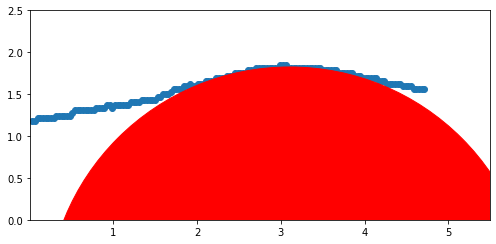

In [90]:
from matplotlib import pyplot as plt, patches
plt.rcParams["figure.figsize"] = [7, 3.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((x0, y0), radius=r_1, color='red')
ax.add_patch(circle1)
ax.axis('equal')
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.xlim(1, 4.5)
plt.ylim(0, 2.5)
plt.show()

Similarly, we can also make Orange Line Curve Fitting

In [91]:
x_new = np.array(x_new)
y2_new = np.array(y2_new)
A2 = np.c_[-2*x_new,-2*y2_new,ones]
A2_Trans = A2.T

In [92]:
x0_0,y0_0,b_0=np.linalg.solve(A2_Trans@A2,A2_Trans@(-(x_new**2)-(y2_new**2)))
x0_0,y0_0

(2.862765891536298, 7.768220787097366)

In [93]:
r_2 = np.sqrt(x0_0**2+y0_0**2-b_0)
r_2

2.511381907804085

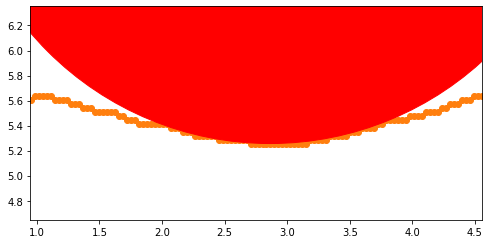

In [99]:
from matplotlib import pyplot as plt, patches
plt.rcParams["figure.figsize"] = [7, 3.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((x0_0, y0_0), radius=r_2, color='red')
ax.add_patch(circle1)
ax.axis('equal')
plt.scatter(x, y1)
plt.scatter(x, y2)
plt.xlim(1, 4.5)
plt.ylim(5, 6)
plt.show()

Put them together!

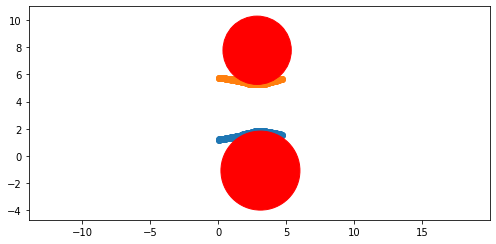

In [98]:
from matplotlib import pyplot as plt, patches
plt.rcParams["figure.figsize"] = [7, 3.5]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot()
circle1 = patches.Circle((x0, y0), radius=r_1, color='red')
circle2 = patches.Circle((x0_0, y0_0), radius=r_2, color='red')
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.axis('equal')
plt.scatter(x, y1)
plt.scatter(x, y2)

plt.show()